In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

In [14]:
l = 100
x, y = np.indices((l, l))

center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)

radius1, radius2, radius3, radius4 = 16, 14, 15, 14

circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1 ** 2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2 ** 2
circle3 = (x - center3[0]) ** 2 + (y - center3[1]) ** 2 < radius3 ** 2
circle4 = (x - center4[0]) ** 2 + (y - center4[1]) ** 2 < radius4 ** 2

In [28]:
print labels.shape, graph.shape, label_im.shape, mask.shape

(1394,) (1394, 1394) (100, 100) (100, 100)


In [37]:
img = circle1 + circle2 + circle3 + circle4
mask = img.astype(bool)
img = img.astype(float)

img += 1 + 0.2 * np.random.randn(*img.shape)

# Convert the image into a graph with the value of the gradient on the
# edges.
graph = image.img_to_graph(img, mask=mask)

# Take a decreasing function of the gradient: we take it weakly
# dependent from the gradient the segmentation is close to a voronoi
graph.data = np.exp(-graph.data / graph.data.std())

# Force the solver to be arpack, since amg is numerically
# unstable on this example
# labels = spectral_clustering(graph, n_clusters=4, eigen_solver='arpack')
# label_im = -np.ones(mask.shape)
# label_im[mask] = labels

# plt.matshow(img)
# plt.matshow(label_im)

# img = circle1 + circle2
# mask = img.astype(bool)
# img = img.astype(float)

img += 1 + 0.2 * np.random.randn(*img.shape)

graph = image.img_to_graph(img, mask=mask)
graph.data = np.exp(-graph.data / graph.data.std())

# labels = spectral_clustering(graph, n_clusters=4, eigen_solver='arpack')
# label_im = -np.ones(mask.shape)
# label_im[mask] = labels

# plt.matshow(img)
# plt.matshow(label_im)

# plt.show()


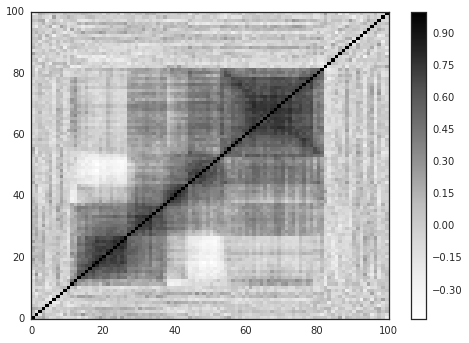

In [46]:
# plotting the correlation matrix
import pylab
R = np.corrcoef(img)
pylab.pcolor(R)
pylab.colorbar()
show()

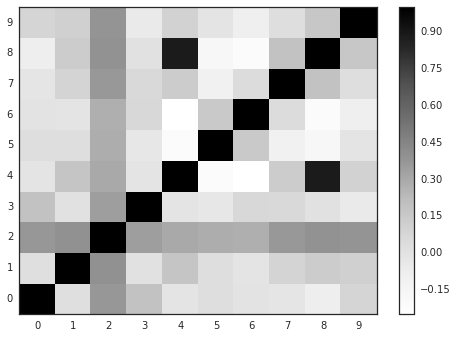

In [47]:
from numpy import corrcoef, sum, log, arange
from numpy.random import rand
from pylab import pcolor, show, colorbar, xticks, yticks

# generating some uncorrelated data
data = rand(10,100) # each row of represents a variable

# creating correlation between the variables
# variable 2 is correlated with all the other variables
data[2,:] = sum(data,0)
# variable 4 is correlated with variable 8
data[4,:] = log(data[8,:])*0.5

# plotting the correlation matrix
R = corrcoef(data)
pcolor(R)
colorbar()
yticks(arange(0.5,10.5),range(0,10))
xticks(arange(0.5,10.5),range(0,10))
show()